In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from statsmodels.api import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [22]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [23]:
# Read Classified field dataset 
FieldData0 = pd.read_csv('data_raw/ClassifiedData/FieldData_class.csv')

# Remove none values
FieldData = FieldData0.dropna()

# Display DataFrame
print(FieldData)

      Unnamed: 0         Lake Name          Y          X       Date  Year  \
0              0  Little Long Pond  40.977600 -72.296204   6/4/2016  2016   
1              1        Hatch Lake  42.834598 -75.677803   6/5/2016  2016   
2              2   Montgomery Lake  41.525299 -74.917297   6/4/2016  2016   
3              3         Dean Pond  42.447700 -76.003403   6/4/2016  2016   
4              4   Chautauqua Lake  42.219885 -79.455423   6/5/2016  2016   
...          ...               ...        ...        ...        ...   ...   
4599        4599         Long Pond  40.975102 -72.290802  7/12/2020  2020   
4600        4600         Long Pond  40.975102 -72.290802  7/26/2020  2020   
4601        4601         Long Pond  40.975102 -72.290802   8/9/2020  2020   
4602        4602         Long Pond  40.975102 -72.290802  8/23/2020  2020   
4603        4603         Long Pond  40.975102 -72.290802   9/7/2020  2020   

      Month  Day  Chl-a(ug/l)  SDD (m)  Phos (mg/l)  Chl score  SDD score  

In [24]:
# Read S2 dataset 
S2Data0 = pd.read_csv('data_raw/ClassifiedData/S2Data.csv')

# Remove none values
S2Data = S2Data0.dropna()

# Display DataFrame
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956819 -0.044095 -0.022067  0.117900  0.002955   
1      2016      5    7  0.956897 -0.043909 -0.022026  0.117907  0.002955   
2      2016      5    7  1.015060  0.016807  0.007474  0.147959  0.008728   
3      2016      5    7  0.991619 -0.009014 -0.004208  0.142645  0.007528   
4      2016      5    7  0.881187 -0.110047 -0.063158  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.853926 -0.129055 -0.078792  0.152807  0.001676   
35029  2020     10   30  1.077396  0.061427  0.037256  0.126659  0.001469   
35030  2020     10   30  0.945077 -0.051659 -0.028237  0.134852  0.007321   
35031  2020     10   30  0.961857 -0.039219 -0.019442  0.132445  0.007393   
35032  2020     10   30  0.959639 -0.039047 -0.020596  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [25]:
# Merge classified FieldData and S2Data; 
Data_class = pd.merge(FieldData, S2Data, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
Data_class.to_csv('data_output/ClassifiedData/Data_class.csv')

# displaying result
print(Data_class)

      Unnamed: 0          Lake Name          Y          X       Date  Year  \
0             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
1             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
2             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
3             39     Cazenovia Lake  42.948200 -75.872002  6/23/2016  2016   
4             39     Cazenovia Lake  42.948200 -75.872002  6/23/2016  2016   
...          ...                ...        ...        ...        ...   ...   
1088        4587  Little Fresh Pond  40.918201 -72.408501  8/30/2020  2020   
1089        4592   Little Long Pond  40.977600 -72.296204  7/26/2020  2020   
1090        4592   Little Long Pond  40.977600 -72.296204  7/26/2020  2020   
1091        4600          Long Pond  40.975102 -72.290802  7/26/2020  2020   
1092        4600          Long Pond  40.975102 -72.290802  7/26/2020  2020   

      Month  Day  Chl-a(ug/l)  SDD (m)  ...       B12        B2

In [26]:
# Select Mesoeutrophic Data 
Mesoeutrophic_data = Data_class.loc[(Data_class['Tropic state'] == 'Mesoeutrophic')]
Mesoeutrophic_data.to_csv('data_output/ClassifiedData/Mesoeutrophic_data.csv')
Mesoeutrophic_data.shape

(313, 32)

In [27]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a(ug/l)']

# get the summary for Mesoeutrophic Lakes
desc_Mesoeutrophic = Mesoeutrophic_data [list].describe()

# add the standard deviation metric
desc_Mesoeutrophic.loc['+3_std'] = desc_Mesoeutrophic.loc['mean'] + (desc_Mesoeutrophic.loc['std'] * 3)
desc_Mesoeutrophic.loc['-3_std'] = desc_Mesoeutrophic.loc['mean'] - (desc_Mesoeutrophic.loc['std'] * 3)

# display it
desc_Mesoeutrophic

,2BDA,3BDA,NDCI,Chl-a(ug/l)
count,313.000000,313.000000,313.000000,313.000000
mean,1.053717,0.071768,0.020797,26.609406
std,0.166798,0.230351,0.066948,25.498756
min,0.843826,-0.141562,-0.084701,0.100000
25%,0.950351,-0.053652,-0.025456,10.200000
50%,1.004335,0.005915,0.002163,17.500000
75%,1.095331,0.116589,0.045497,34.000000
max,2.165359,1.995223,0.368160,166.300000
+3_std,1.554112,0.762821,0.221642,103.105672
-3_std,0.553322,-0.619286,-0.180048,-49.886861


In [28]:
# Pearson Coefficient 
corr = Mesoeutrophic_data[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,3BDA,NDCI,Chl-a(ug/l)
2BDA,1.000000,0.913397,0.988645,0.522209
3BDA,0.913397,1.000000,0.902230,0.354314
NDCI,0.988645,0.902230,1.000000,0.547113
Chl-a(ug/l),0.522209,0.354314,0.547113,1.000000


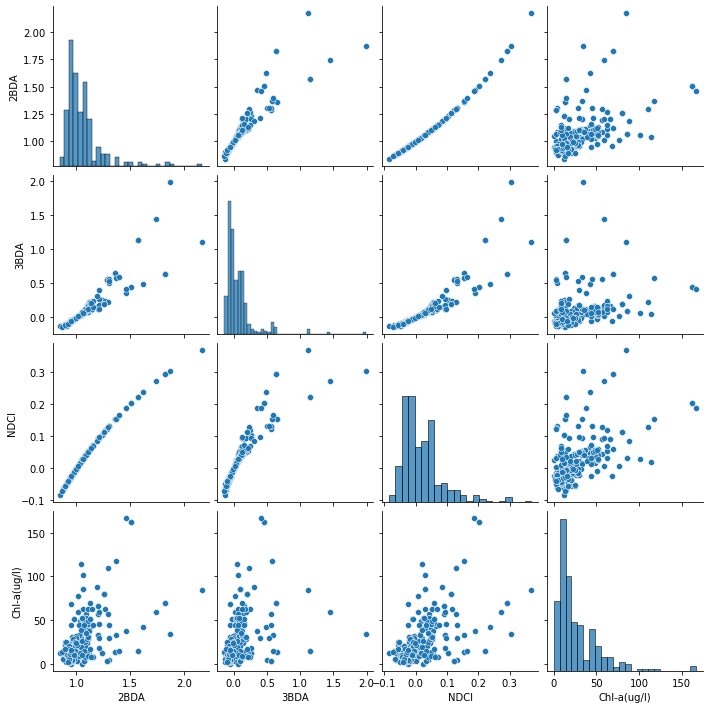

In [29]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Mesoeutrophic_data[list])

In [30]:
# Select Outliers (2BDA) 
Outlires_2BDA = Mesoeutrophic_data.loc[(Mesoeutrophic_data['2BDA'] > 1.5)]
Outlires_2BDA.to_csv('data_output/ClassifiedData/Outliers_2BDA.csv')
Outlires_2BDA.shape

(10, 32)

In [31]:
# Select Outliers (3BDA)
Outlires_3BDA = Mesoeutrophic_data.loc[(Mesoeutrophic_data['3BDA'] > 1)]
Outlires_3BDA.to_csv('data_output/ClassifiedData/Outliers_3BDA.csv')
Outlires_3BDA.shape

(5, 32)

In [34]:
# Select data without Outliers (2BDA) 
RemoveOutliers_2BDA = Mesoeutrophic_data.loc[(Mesoeutrophic_data['2BDA'] <= 1.5)]
RemoveOutliers_2BDA.shape

(303, 32)

In [36]:
# Select data without Outliers (3BDA) 
RemoveOutliers_3BDA = Mesoeutrophic_data.loc[(Mesoeutrophic_data['3BDA'] <= 1)]
RemoveOutliers_3BDA.shape

(308, 32)

In [38]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = RemoveOutliers_2BDA["Chl-a(ug/l)"]

In [39]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(RemoveOutliers_2BDA[X_columns[0:3]].values, i) for i in range(RemoveOutliers_2BDA[X_columns[0:3]].shape[1])]
vif["features"] = RemoveOutliers_2BDA[X_columns[0:3]].columns

# display VIF
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,9.0,3BDA
2,9.0,NDCI


In [40]:
# Extract independent variables (X) & dependent variable (Y)
X = RemoveOutliers_2BDA[X_columns]
X = add_constant(X)
Y = RemoveOutliers_2BDA['Chl-a(ug/l)']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Chl-a(ug/l)   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     59.55
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           7.82e-28
Time:                        14:33:24   Log-Likelihood:                -901.13
No. Observations:                 212   AIC:                             1810.
Df Residuals:                     208   BIC:                             1824.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -241.3749    144.088     -1.675      0.0

In [41]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)

predicted Y: 766     27.355915
573      8.295257
865      2.570819
630     30.092120
686     13.600419
          ...    
381     22.022562
375     38.568598
246     29.480822
1044    36.115762
968     12.143603
Length: 91, dtype: float64


In [42]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 3.78e+02
MAE 14.0
RMSE 19.4


In [43]:
# 2 variables model (2BDA & 3BDA) after removing outliers (2bda > 1.5)

In [44]:
list1 = ['2BDA', '3BDA', 'Chl-a(ug/l)']

# get the summary for Mesoeutrophic Lakes
desc_Mesoeutrophic = RemoveOutliers_2BDA [list1].describe()

# add the standard deviation metric
desc_Mesoeutrophic.loc['+3_std'] = desc_Mesoeutrophic.loc['mean'] + (desc_Mesoeutrophic.loc['std'] * 3)
desc_Mesoeutrophic.loc['-3_std'] = desc_Mesoeutrophic.loc['mean'] - (desc_Mesoeutrophic.loc['std'] * 3)

# display it
desc_Mesoeutrophic

,2BDA,3BDA,Chl-a(ug/l)
count,303.000000,303.000000,303.000000
mean,1.031674,0.042770,25.135406
std,0.110441,0.143593,22.794929
min,0.843826,-0.141562,0.100000
25%,0.948429,-0.054669,10.200000
50%,0.997381,-0.002050,16.820000
75%,1.089248,0.108604,32.760000
max,1.464936,0.651543,166.300000
+3_std,1.362998,0.473549,93.520194
-3_std,0.700349,-0.388009,-43.249382


In [45]:
# Pearson Coefficient 
corr = RemoveOutliers_2BDA[list1].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,3BDA,Chl-a(ug/l)
2BDA,1.000000,0.942202,0.531191
3BDA,0.942202,1.000000,0.389515
Chl-a(ug/l),0.531191,0.389515,1.000000


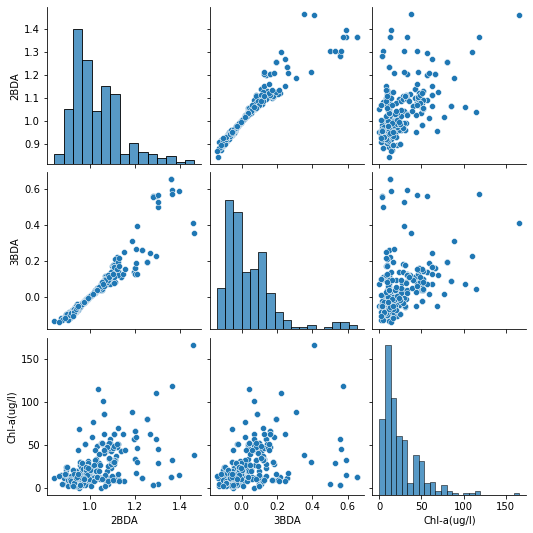

In [46]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(RemoveOutliers_2BDA[list1])

In [47]:
# Getting column names
X_columns1 = ["2BDA", "3BDA"]
Y = RemoveOutliers_2BDA["Chl-a(ug/l)"]

In [48]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(RemoveOutliers_2BDA[X_columns1[0:2]].values, i) for i in range(RemoveOutliers_2BDA[X_columns1[0:2]].shape[1])]
vif["features"] = RemoveOutliers_2BDA[X_columns1[0:2]].columns

# display VIF
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,1.0,3BDA


In [49]:
# Extract independent variables (X) & dependent variable (Y)
X = RemoveOutliers_2BDA[X_columns1]
X = add_constant(X)
Y = RemoveOutliers_2BDA['Chl-a(ug/l)']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Chl-a(ug/l)   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     89.65
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           7.70e-29
Time:                        14:36:06   Log-Likelihood:                -901.19
No. Observations:                 212   AIC:                             1808.
Df Residuals:                     209   BIC:                             1818.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -289.3789     29.753     -9.726      0.0

In [70]:
# 2 variables model (2BDA & NDCI) remove 2bda > 1.5

In [50]:
list2 = ['2BDA', 'NDCI', 'Chl-a(ug/l)']

# get the summary for Mesoeutrophic Lakes
desc_Mesoeutrophic = RemoveOutliers_2BDA [list2].describe()

# add the standard deviation metric
desc_Mesoeutrophic.loc['+3_std'] = desc_Mesoeutrophic.loc['mean'] + (desc_Mesoeutrophic.loc['std'] * 3)
desc_Mesoeutrophic.loc['-3_std'] = desc_Mesoeutrophic.loc['mean'] - (desc_Mesoeutrophic.loc['std'] * 3)

# display it
desc_Mesoeutrophic

,2BDA,NDCI,Chl-a(ug/l)
count,303.000000,303.000000,303.000000
mean,1.031674,0.012854,25.135406
std,0.110441,0.050633,22.794929
min,0.843826,-0.084701,0.100000
25%,0.948429,-0.026468,10.200000
50%,0.997381,-0.001311,16.820000
75%,1.089248,0.042718,32.760000
max,1.464936,0.188620,166.300000
+3_std,1.362998,0.164753,93.520194
-3_std,0.700349,-0.139044,-43.249382


In [51]:
# Pearson Coefficient 
corr = RemoveOutliers_2BDA[list2].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,NDCI,Chl-a(ug/l)
2BDA,1.000000,0.997242,0.531191
NDCI,0.997242,1.000000,0.534265
Chl-a(ug/l),0.531191,0.534265,1.000000


In [52]:
# Getting column names
X_columns2 = ["2BDA", "NDCI"]
Y = RemoveOutliers_2BDA["Chl-a(ug/l)"]

In [53]:
# Extract independent variables (X) & dependent variable (Y)
X = RemoveOutliers_2BDA[X_columns2]
X = add_constant(X)
Y = RemoveOutliers_2BDA['Chl-a(ug/l)']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Chl-a(ug/l)   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     53.48
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           1.75e-19
Time:                        14:37:30   Log-Likelihood:                -923.04
No. Observations:                 212   AIC:                             1852.
Df Residuals:                     209   BIC:                             1862.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.8483    150.874      0.529      0.5